In [1]:
import numpy as np
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
import string
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# Define the search term and the date_since date as variables
search_words = "Nissan OR Toyota OR Mercedes OR BMW -filter:retweets"

date_since = "2020-12-19"

In [5]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(2500)

all_tweets = [[tweet.created_at, tweet.text] for tweet in tweets]

In [16]:
df = pd.DataFrame(data=all_tweets, 
                    columns=['date', "text"])

In [18]:
df.date = pd.to_datetime(df['date'], infer_datetime_format=True)

In [19]:
df = df.set_index('date')

In [21]:
df.head()

,text
date,
2020-12-21 05:38:50,@YEPjormh @thecodemiko \nSebastian from Merced...
2020-12-21 05:38:48,@Silversalty @engadget BMW is trying subscript...
2020-12-21 05:38:36,she keeps posting him https://t.co/XLGEc5Vg0U
2020-12-21 05:38:21,@karinaarivass I had a toyota to start with lo...
2020-12-21 05:38:20,"Either in your Mercedes-Benz, which is gorgeou..."


In [22]:
df['Nissan'] =  df['text'].str.contains('Nissan', case = False)
df['Toyota'] = df['text'].str.contains('Toyota', case = False)
df['Mercedes'] =  df['text'].str.contains('Mercedes', case = False)
df['BMW'] = df['text'].str.contains('BMW', case = False)

In [23]:
df.head()

,text,Nissan,Toyota,Mercedes,BMW
date,,,,,
2020-12-21 05:38:50,@YEPjormh @thecodemiko \nSebastian from Merced...,False,False,True,False
2020-12-21 05:38:48,@Silversalty @engadget BMW is trying subscript...,False,False,False,True
2020-12-21 05:38:36,she keeps posting him https://t.co/XLGEc5Vg0U,False,False,False,False
2020-12-21 05:38:21,@karinaarivass I had a toyota to start with lo...,False,True,False,False
2020-12-21 05:38:20,"Either in your Mercedes-Benz, which is gorgeou...",False,False,True,False


In [27]:
nissan_df = df[df['Nissan']==True]
toyota_df = df[df['Toyota']==True]
bmw_df = df[df['BMW']==True]
mercedes_df = df[df['Mercedes']==True]

In [30]:
print("Proportion of #Mercedes tweets:", np.sum(df['Mercedes']) / df.shape[0])

Proportion of #Mercedes tweets: 0.2472


In [31]:
print("Proportion of #BMW tweets:", np.sum(df['BMW']) / df.shape[0])

Proportion of #BMW tweets: 0.1708


In [32]:
print("Proportion of #nissan tweets:", np.sum(df['Nissan']) / df.shape[0])

Proportion of #nissan tweets: 0.0996


In [33]:
print("Proportion of #toyota tweets:", np.sum(df['Toyota']) / df.shape[0])

Proportion of #toyota tweets: 0.2616


In [40]:
np.sum(df['Toyota'])

654

In [52]:
car_tweets = {'Mercedes':np.sum(df['Mercedes']),'BMW': np.sum(df['BMW']), 'Toyota':np.sum(df['Toyota']),'Nissan':np.sum(df['Nissan'])}


In [59]:
car_tweet = pd.DataFrame(list(car_tweets.items()),columns = ['Brand','Nr_Tweets']) 

In [60]:
car_tweet

,Brand,Nr_Tweets
0,Mercedes,618
1,BMW,427
2,Toyota,654
3,Nissan,249


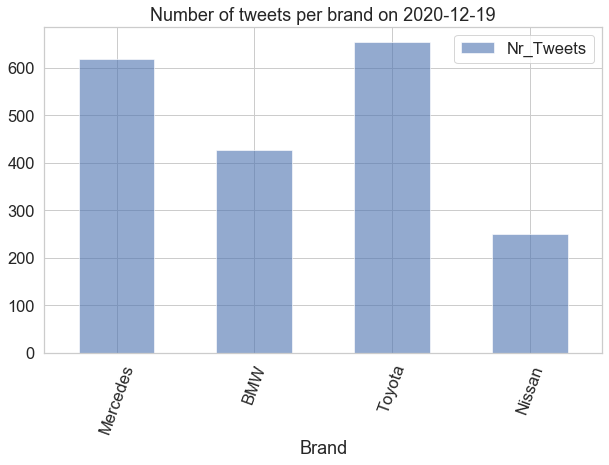

In [72]:
car_tweet.plot.bar(x="Brand", y="Nr_Tweets", rot=70, title="Number of tweets per brand on 2020-12-19",
                  width=0.55, alpha=0.6, figsize=(10,6));

plt.show();

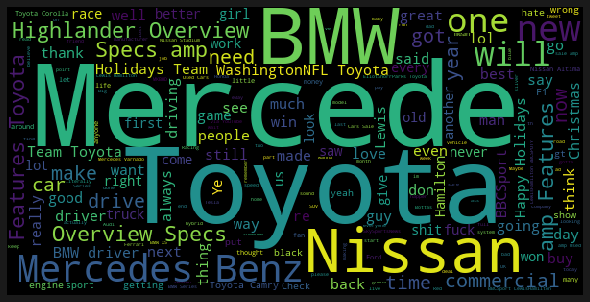

In [82]:
#WORD CLOUD
text = " ".join(tweet for tweet in df['text'])

stopwords = set(STOPWORDS)
stopwords.update(["https", "car", "know",'co'])

# Create and generate a word cloud image:

wordcloud = WordCloud(stopwords=stopwords,width=600, height=300).generate(text)

plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
